# A workstation for troubleshooting thermal correlators

In [2]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter
#Custom made imports
import single_particle_sector as sps
import thermal_expectations_BGS as th
from time import time
import pandas as pd

In [3]:
def plot_P_beta(h_i, P_beta, betas, n):
    for b in range(len(betas)):
        b_index = -b-1
        plt.figure()
        for ni in range(len(n)):
            plt.plot(h_i, P_beta[b_index, :, ni], label=f"n={n[ni]}")
        plt.title(f"Beta = {betas[b_index]}")
        plt.xlim(h_i[0], h_i[-1])
        plt.ylim(0, 1)
        plt.legend()
        plt.show()

def compute_P_beta(L, J, h_i, betas, n, p):
    P_beta = []
    for beta in betas:
        dat = []
        for h in h_i:
            args = (L, J, h)
            G = th.G_th(p, beta, args)
            P = [sps.P_n(ns, G, L) for ns in n]
            dat.append(P)
        P_beta.append(dat)
    return np.array(P_beta)


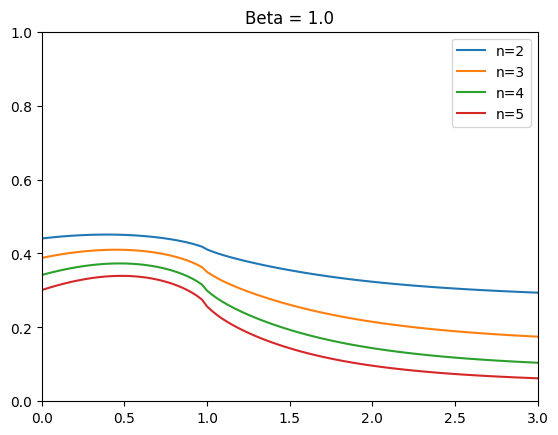

In [119]:
#Model Parameters
L = 10
J = -1
h = 1
#Fixed Betas, variable l
betas = np.array([1.])
h_i = np.linspace(0,3,100)
n = [i for i in range(2,6)]
p = [0,1]

L = 50
J = -1

P_beta = compute_P_beta(L,J,h_i,betas,n,p)
plot_P_beta(h_i,P_beta,betas,n)

In [5]:
df1 = pd.read_csv("/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/results/thermal_averages/L=50_n=2_TFIM_thermal_average.txt", delimiter="\t", header=None, skiprows=1,engine="python")
df2 = pd.read_csv("/home/kristian/Desktop/Subsystem Loschmidt Echo/subsystem_loschmidt_echo/results/thermal_averages/L=50_n=3_TFIM_thermal_average.txt", delimiter="\t", header=None, skiprows=1,engine="python")


h = df1.iloc[0]

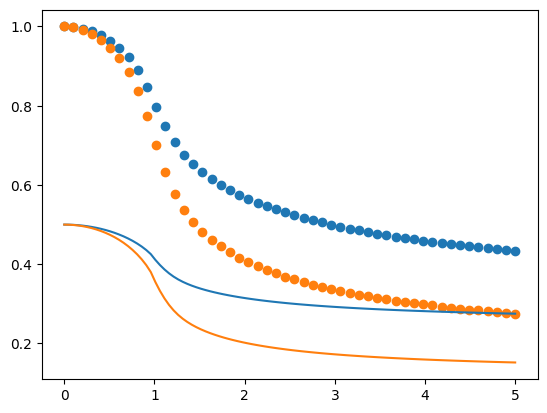

In [6]:
i = -1
scatter(h,df1.iloc[i])
scatter(h,df2.iloc[i])
plot(h_i,P_beta[0])

In [29]:
#Trying to trace error:
L = 50
J = -1
h = 1
betas = np.linspace(0,5,11)
beta = 100
p = [0]
args = (L, J, h)
G = th.G_th(p, beta, args)
sps.sigma_general([0,3],G,L)

np.float64(0.4899936691397905)

In [88]:
E,V,n= th.E_p(0,L,J,h)
beta = 10
print(th.Z_p(n,E,beta))


1.0000000000000004


In [78]:

def Z_p(n,E,beta):
    #Definition given in first source
    Z =  np.exp(beta*np.sum(E))*(np.prod(1+np.exp(-beta*2*E))
        +n*np.prod(1-np.exp(-2*beta*E)))
    return Z/2
###Functions
def E_p(p,L,J,h):
    #Currently only for PBC or ABC
    bc = ["ABC","PBC"]
    bc = bc[p]
    
    #Hamiltonian and spectrum
    H = sps.H_bdg(h,L,J,bc)
    E, U = la.eigh(H)
   # E -= min(E)
    E = E[L:]#/2
    #Ground state correlation matrix
    G_gs = sps.G_tfim(U[:,:L])
    F = G_gs[:L,L:]
    G = G_gs[:L,:L]
    M = np.eye(L)-2*(G+F)
    #Determine parity
    n = la.det(M)*(-1)**L * (-1)**2

    return  E,U,n

0.5
0.5


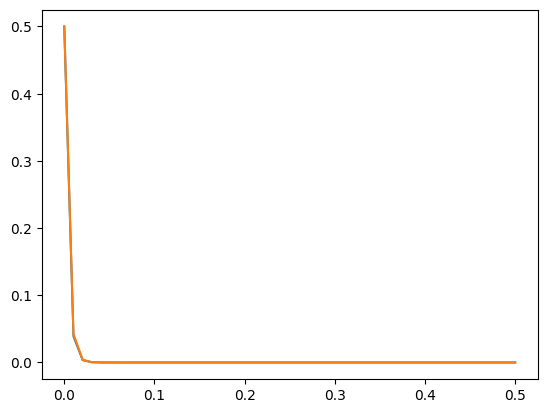

In [129]:
bi = np.linspace(0,0.5,50)
h = 5
L = 50
beta = 0
###
E,V,n= th.E_p(0,L,J,h)
Z = th.Z_p(n,E,beta)
print(th.ca(n,E,beta,0)/Z)
print(th.ac(n,E,beta,0)/Z)

ca_x = [th.ca(n,E,b,0)/Z for b in bi]
ac_x = [th.ac(n,E,b,0)/Z for b in bi]

plot(bi,ca_x)
plot(bi,ac_x)

In [131]:
E*2

array([ 8.00493166,  8.00493166,  8.04415999,  8.04415999,  8.12143702,
        8.12143702,  8.23449561,  8.23449561,  8.38014815,  8.38014815,
        8.5545    ,  8.5545    ,  8.75317747,  8.75317747,  8.97154334,
        8.97154334,  9.20488202,  9.20488202,  9.44854581,  9.44854581,
        9.69806189,  9.69806189,  9.94920452,  9.94920452, 10.19803903,
       10.19803903, 10.44094485, 10.44094485, 10.6746239 , 10.6746239 ,
       10.8960994 , 10.8960994 , 11.10270899, 11.10270899, 11.29209503,
       11.29209503, 11.46219369, 11.46219369, 11.6112243 , 11.6112243 ,
       11.73767937, 11.73767937, 11.84031596, 11.84031596, 11.91814837,
       11.91814837, 11.97044235, 11.97044235, 11.99671076, 11.99671076])